In [52]:
from simulation import generateDag
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from tqdm import tqdm

def test_params(n_estimators, max_depth, min_samples_split, max_features, nums):
    tots = []
    for i in range(10):
        df, _, _, _ = generateDag(nums, 1)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features)
        model.fit(np.array(df[['W1','W2']]), np.array(df['A']))
        propensity = model.predict_proba(np.array(df[['W1','W2']]))
        props = propensity[:,1]
        
        IPW_1 = df['Y']*df['A']/(props)
        IPW_0 = (df['Y']*(1-df['A']))/(1 - props)
        # Compute the ACE
        ACE = (diff := IPW_1 - IPW_0).sum() / len(diff)
        tots.append(ACE)
    return sum(tots)/len(tots)


def tune(num,nums, results = None):
    if not results:
        results = {}
    m = [i for i in range(10, 200, 10)]
    m = m + [2, 3, 4, 5, 6, 7, 8, 9]
    params = {
        "n_estimators" : [10, 25, 50, 100, 150, 200, 250, 300, 350, 400, 500],
        "max_depth" : [1, 2, 3,4, 5,6, 7,8,9, 10],
        "min_samples_split": [i for i in range(10, 200, 10)],
        "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
    }
    for i in tqdm(range(num), desc="Running Parameter Search"):
        n = np.random.choice(params["n_estimators"])
        m = np.random.choice(params["max_depth"])
        s = np.random.choice(params["min_samples_split"])
        f = np.random.choice(params["max_features"])
        if (n,m,s,f) not in results.keys():
            res = test_params(n,m,s,f, nums)
            results[(n,m,s,f)] = res
    return results

In [49]:
print(test_params(100, 5, 50, 9, 500))

0.5504198589147851


In [59]:
results_large = tune(100, 10000, None)

Running Parameter Search: 100%|██████████| 100/100 [25:16<00:00, 15.16s/it]


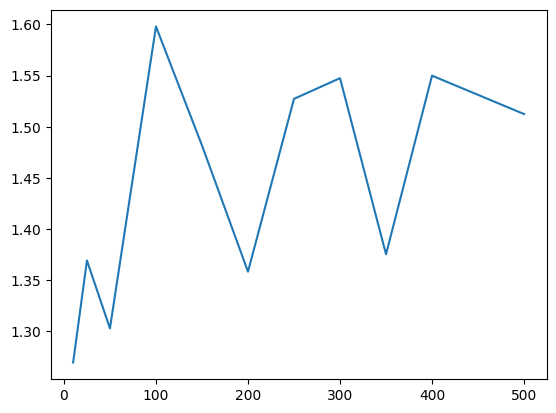

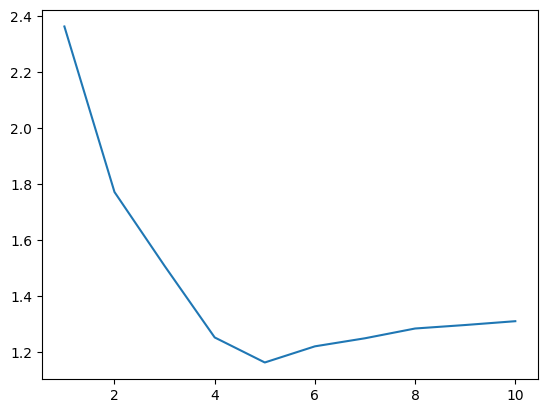

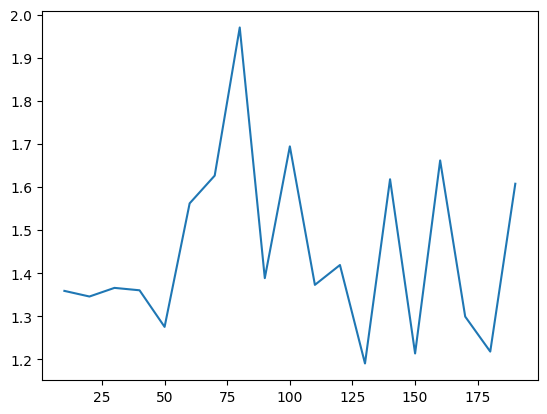

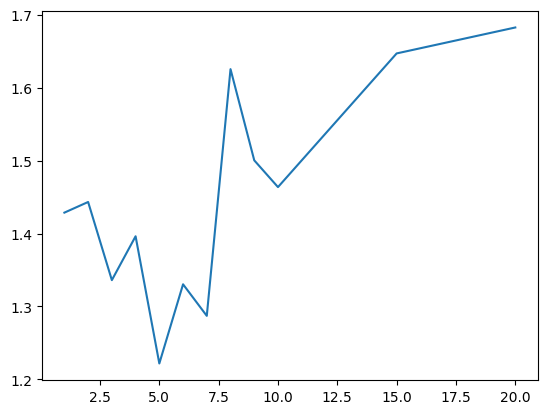

In [60]:
import matplotlib.pyplot as plt

n = {}
m = {}
s = {}
f = {}

for key, value in results_large.items():
    if key[0] in n:
        n[key[0]].append(value)
    else:
        n[key[0]] = [value]
    if key[1] in m:
        m[key[1]].append(value)
    else:
        m[key[1]] = [value]
    if key[2] in s:
        s[key[2]].append(value)
    else:
        s[key[2]] = [value]
    if key[3] in f:
        f[key[3]].append(value)
    else:
        f[key[3]] = [value]

n = dict(sorted(n.items()))
x = n.keys()
y = [sum(i)/len(i) for _, i in n.items()]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

m = dict(sorted(m.items()))
x = m.keys()
y = [sum(i)/len(i) for _, i in m.items()]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

s = dict(sorted(s.items()))
x = list(s.keys())
y = [sum(i)/len(i) for _, i in s.items()]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

f = dict(sorted(f.items()))
x = list(f.keys())
y = [sum(i)/len(i) for _, i in f.items()]
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [61]:
mins = (1,2,3,4), 10
for key, value in results_large.items():
    if value < mins[1]:
        mins = key, value
print(mins)

((np.int64(10), np.int64(5), np.int64(90), np.int64(4)), np.float64(1.1301478470377646))
